<a href="https://colab.research.google.com/github/HWKKK/AIFFEL_quest_cr/blob/main/Datathon/Datathon_M1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. 프로젝트 개요
- 목표: 런던에서 에어비앤비를 운영하려는 예비 호스트 왓슨씨. 왓슨씨의 매출을 최대로 올릴 수 있는 에어비앤비 운영 전략을 제시한다.
- 가정: 왓슨씨의 임대료 예산은 런던 평균 임대료의 25%~75% 사이로 한다.
- 사용 데이터:
  - Inside Airbnb 데이터 (숙소 정보)
  - London Data Store 데이터 (지역별 평균 임대료)
- 주요 라이브러리:
  - Pandas, NumPy (데이터 처리)
  - Matplotlib, Seaborn, Plotly (데이터 시각화)
  - Scikit-learn (기계 학습 모델)
  - Statsmodels (회귀 분석)

# 1. 가설 설정


#### **가설 설정 전략:**
1) 왓슨씨가 실제로 할 법한 고민을 추측하고, 이에 기반하여 가설을 설정한다.   
2) 매출은 가격이 높을수록, 예약률이 높을수록 높다. 따라서, 가격과 예약률에 영향을 미치는 변수를 분석한다.

<br>

#### **문제 1: 어떤 지역이 에어비앤비 숙소 운영에 가장 수익성이 높은가?**
- **가설:** 중심지에 위치한 숙소일수록 높은 수익을 올릴 것이다.
- **분석할 변수:**
  - neighbourhood_cleansed (숙소가 위치한 지역)
  - price (숙박 요금)
  - availability_365 (연간 예약 가능 일수)
  - number_of_reviews (리뷰 수)

<br>

#### **문제 2: 숙소의 어떤 특성이 높은 숙박 요금과 연관되어 있는가?**
- **가설:** 더 많은 편의시설과 넓은 공간을 제공하는 숙소는 높은 숙박 요금을 받을 것이다.
- **분석할 변수:**
  - amenities_count (제공하는 편의시설 수)
  - bedrooms (침실 수)
  - bathrooms (욕실 수)
  - price (숙박 요금)

<br>

#### **문제 3: 호스트의 응답성이 예약률에 영향을 미치는가?**
- **가설:** 호스트의 응답률이 높을수록 예약률도 높을 것이다.
- **분석할 변수:**
  - host_response_rate (호스트 응답률)
  - availability_365 (연간 예약 가능 일수)
  - number_of_reviews (리뷰 수)

# 2. 라이브러리 설치 및 데이터 불러오기

In [24]:
#드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [25]:
# 라이브러리 설치
!pip install pandas numpy seaborn matplotlib scikit-learn statsmodels
!pip install ace_tools

In [26]:
# 필요 라이브러리 로드
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import re

In [27]:
# CSV 파일 불러오기 (Colab 환경에서는 직접 업로드 필요)
path = "/content/drive/MyDrive/Colab Notebooks/Datathon/"  # 파일 경로 (사용자의 환경에 맞게 수정)
df = pd.read_csv(path + "listings.csv")

# 데이터 미리보기
df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,56229,https://www.airbnb.com/rooms/56229,20241211032909,2024-12-12,city scrape,Cosy Double studio in Zone 2 Hammersmith (1),NaN,NaN,https://a0.muscache.com/pictures/3860587/79e73...,216660,...,4.79,4.92,4.71,NaN,f,11,9,1,0,0.84
1,62970,https://www.airbnb.com/rooms/62970,20241211032909,2024-12-12,city scrape,3 Bedrm with Garden off Brick lane refurbd Oct24,Recently renovated (Oct 2024) warehouse conve...,The neighbourhood is fantastic with Brick Lane...,https://a0.muscache.com/pictures/prohost-api/H...,336059,...,4.74,4.63,4.51,NaN,t,1,1,0,0,1.05
2,63948,https://www.airbnb.com/rooms/63948,20241211032909,2024-12-12,city scrape,Cosy Double studio in Zone 2 Hammersmith (4),NaN,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,216660,...,4.78,4.91,4.60,NaN,f,11,9,1,0,1.06
3,66772,https://www.airbnb.com/rooms/66772,20241211032909,2024-12-11,city scrape,Cosy Double studio in Zone 2 Hammersmith (3),NaN,NaN,https://a0.muscache.com/pictures/c71a4e64-97f8...,216660,...,4.77,4.92,4.67,NaN,f,11,9,1,0,1.10
4,69198,https://www.airbnb.com/rooms/69198,20241211032909,2024-12-11,city scrape,Spacious single room in quiet flat,NaN,The flat is situated in a culturally vibrant a...,https://a0.muscache.com/pictures/6073529/f5cf9...,345886,...,4.85,4.62,4.23,NaN,f,1,0,1,0,0.09


# 3. 데이터 탐색 및 변수 확인

In [28]:
# 데이터 크기 확인 (행 개수, 열 개수)
df.shape
print('\n============')

# 데이터 정보 확인 (결측치, 데이터 타입 등)
df.info()
print('\n============')

# 주요 통계 정보 확인
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95144 entries, 0 to 95143
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            95144 non-null  int64  
 1   listing_url                                   95144 non-null  object 
 2   scrape_id                                     95144 non-null  int64  
 3   last_scraped                                  95144 non-null  object 
 4   source                                        95144 non-null  object 
 5   name                                          95144 non-null  object 
 6   description                                   92196 non-null  object 
 7   neighborhood_overview                         43463 non-null  object 
 8   picture_url                                   95134 non-null  object 
 9   host_id                                       95144 non-null

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,9.514400e+04,9.514400e+04,9.514400e+04,95137.000000,95137.000000,0.0,95144.000000,95144.000000,95144.000000,62744.000000,...,70515.000000,70538.000000,70513.000000,70513.000000,0.0,95144.000000,95144.000000,95144.000000,95144.000000,70560.000000
mean,5.771470e+17,2.024121e+13,1.940478e+08,29.007263,57.870240,NaN,51.509922,-0.126440,3.277211,1.352480,...,4.794925,4.819357,4.733760,4.623557,NaN,14.904334,12.753300,2.013359,0.021799,1.015615
std,5.304101e+17,1.839853e+01,2.008364e+08,188.811801,454.605517,NaN,0.049072,0.101387,2.044098,0.706792,...,0.418794,0.408583,0.395745,0.493705,NaN,47.331586,46.428105,7.823632,0.362738,1.340759
min,1.391300e+04,2.024121e+13,2.594000e+03,1.000000,1.000000,NaN,51.295937,-0.496160,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.010000
25%,2.752336e+07,2.024121e+13,2.527700e+07,1.000000,1.000000,NaN,51.483900,-0.188960,2.000000,1.000000,...,4.760000,4.800000,4.640000,4.500000,NaN,1.000000,0.000000,0.000000,0.000000,0.160000
50%,7.157820e+17,2.024121e+13,1.024573e+08,2.000000,3.000000,NaN,51.513978,-0.125983,2.000000,1.000000,...,4.930000,4.970000,4.850000,4.750000,NaN,2.000000,1.000000,0.000000,0.000000,0.530000
75%,1.099228e+18,2.024121e+13,3.588072e+08,8.000000,12.000000,NaN,51.539610,-0.066858,4.000000,1.500000,...,5.000000,5.000000,5.000000,4.950000,NaN,7.000000,4.000000,1.000000,0.000000,1.320000
max,1.308834e+18,2.024121e+13,6.662365e+08,3250.000000,7960.000000,NaN,51.682160,0.295969,16.000000,26.000000,...,5.000000,5.000000,5.000000,5.000000,NaN,464.000000,464.000000,125.000000,13.000000,40.020000


### 인사이트
#### 1. 분석에 불필요한 변수 파악 (총 29개)   
&ensp;**1) id :** 숙소의 ID.    
&ensp;**2) listing_url :** 숙소 URL.     
&ensp;**3) scrape_id :** 데이터 수집 과정에서 생성된 ID.   
&ensp;**4) last_scraped :** 데이터가 마지막으로 수집된 날짜.      
&ensp;**5) name :** 숙소 이름.    
&ensp;**6) description:** 숙소 설명.   
&ensp;**7) neighborhood_overview:** 숙소가 위치한 지역 설명. neighbourhood_cleansed 로 대체  
&ensp;**8) picture_url:** 이미지 URL.    
&ensp;**9) host_id:** 호스트 정보.   
&ensp;**10) host_thumbail_url:** 호스트 사진 URL.   
&ensp;**11) calendar_last_scraped:** 데이터 업데이트 시 생성   
&ensp;**12) license:** 라이센스.    
&ensp;**13) calendar_updated:** 마지막으로 예약 캘린더가 업데이트 된 날짜  
&ensp;**14) has_avilability:** 숙소의 현재 예약 가능 여부    
&ensp;**15) host_name:** 호스트 정보.   
&ensp;**16) host_about:** 호스트 정보.   
&ensp;**17) host_neighhourhood:** 호스트 정보.   
&ensp;**18) host_location:** 호스트 정보.   
&ensp;**19) host_picture_url:** 호스트 정보.   
&ensp;**20) host_since:** 호스트 정보.    
&ensp;**21) bathrooms_text:** bathrooms 컬럼으로 대체 가능    
&ensp;**22) host_total_listings_count:** host_listings_count 컬럼으로 대체 가능    
&ensp;**23) host_verifications:** 호스트 인증 방식    
&ensp;**24) neighbourhood:** neighbourhood_cleansed 로 대체   
&ensp;**25) neighbourhood_group_cleansed:** neighbourhood_cleansed 로 대체   
&ensp;**26) first_review:** 첫 리뷰 업로드 시기    
&ensp;**27) last_review:** 마지막 리뷰 업로드 시기    
&ensp;**28) source:** 숙소 수집 경로    
&ensp;**29) host_url:** 호스트 정보    

<br>

#### 2. 분석에 필요하나 결측치가 있는 변수의 처리 방안 (총 13개)
&ensp;**1) price:** 결측치 제거   
&ensp;&ensp; -> why?: 가격이 없는 숙소는 분석이 불가능   
&ensp;**2) reviews_per_month:** 0으로 대체   
&ensp;&ensp; -> why?: 값이 없는 것은 리뷰가 없는 것으로 간주   
&ensp;**3) host_response_time:** 'unknown'으로 대체   
&ensp;&ensp; -> why?: 값이 없는 것은 미응답으로 간주   
&ensp;**4) host_response_rate:** 평균값으로 대체   
&ensp;&ensp; -> why?: 평균값으로 넣어도 분석에 큰 영향을 주지 않음   
&ensp;**5) host_acceptance_rate:** 평균값으로 대체   
&ensp;&ensp; -> why?: 평균값으로 넣어도 분석에 큰 영향을 주지 않음  
&ensp;**6) bedrooms:** 중앙값으로 대체   
&ensp;&ensp; -> why?: 편차가 크므로 중앙값 적용  
&ensp;**7) beds:** 중앙값으로 대체   
&ensp;&ensp; -> why?: 편차가 크므로 중앙값 적용   
&ensp;**8) bathrooms:** 평균값으로 대체    
&ensp;&ensp; -> why?: 숙소의 기본 정보이며, 편차가 크지 않으므로, 평균값으로 대체   
&ensp;**9) reviews_scores_X:** 평균값으로 대체    
&ensp;&ensp; -> why?: 리뷰 점수는 중요하므로 평균값으로 대체   
&ensp;**10) host_listings_count:** 중앙값으로 대체    
&ensp;&ensp; -> why?: 결측치 개수가 적으며, 운영하는 숙소 개수의 편차가 크지 않음   
&ensp;**11) host_has_profile_pic:** 'f' (사진 없음) 처리    
&ensp;&ensp; -> why?: 결측치 개수 적음 (2개)   
&ensp;**12) host_identity_verified:** 'f' (인증 없음) 처리    
&ensp;&ensp; -> why?: 결측치 개수 적음 (2개)   
&ensp;**13) host_is_superhost:** 'f' (슈퍼호스트 아님) 처리    
&ensp;&ensp; -> why?: 슈퍼호스트일 경우 배지를 달아주니, 결측치는 슈퍼호스트가 아닐 가능성이 높음   

<br>

#### 3. 인코딩이 필요한 변수 목록 (총 9개)
&ensp;**1) room_type:** 원-핫 인코딩   
&ensp;**2) neighbourhood_cleansed:** 원-핫 인코딩   
&ensp;**3) host_is_superhost:** 0 or 1   
&ensp;**4) instant_bookable:** 0 or 1   
&ensp;**5) host_response_time:** 시간이 빠른 순으로 순위 매기기   
&ensp;**6) host_has_profile_pic:** 0 or 1   
&ensp;**7) host_identity_verified:** 0 or 1   
&ensp;**8) property_type:** 원-핫 인코딩   
&ensp;**9) amenities:** 각 종류 별 0 or 1 (e.g.) wifi 있으면, has_wifi==1   

<br>

#### 4. 그 밖의 처리 필요 변수 목록 (총 1개)
&ensp;**1) price:** 달러 기호와 쉼표 제거 후 숫자로 변환   


#4. 데이터 전처리

## 1) 불필요한 컬럼 삭제

In [29]:
# 불필요한 컬럼 목록
drop_columns = [
    "id", "listing_url", "scrape_id", "last_scraped", "name", "description",
    "neighborhood_overview", "picture_url", "host_id", "host_thumbnail_url",
    "calendar_last_scraped", "license", "calendar_updated", "has_availability",
    "host_name", "host_about", "host_neighbourhood", "host_location",
    "host_picture_url", "host_since", "bathrooms_text",
    "host_total_listings_count", "host_verifications", "neighbourhood",
    "neighbourhood_group_cleansed", "first_review", "last_review",
    "source", "host_url"
]

# 불필요한 컬럼 삭제
df_cleaned = df.drop(columns=drop_columns)

# 결과 확인
print("기존 데이터 shape:", df.shape)
print("정리된 데이터 shape:", df_cleaned.shape)
df_cleaned.head()

기존 데이터 shape: (95144, 75)
정리된 데이터 shape: (95144, 46)


,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,within a day,99%,95%,f,11.0,t,t,Hammersmith and Fulham,51.49392,-0.22754,...,4.88,4.79,4.92,4.71,f,11,9,1,0,0.84
1,within a few hours,100%,100%,NaN,16.0,t,t,Tower Hamlets,51.52435,-0.06938,...,4.80,4.74,4.63,4.51,t,1,1,0,0,1.05
2,within a day,99%,95%,f,11.0,t,t,Hammersmith and Fulham,51.49547,-0.22864,...,4.87,4.78,4.91,4.60,f,11,9,1,0,1.06
3,within a day,99%,95%,f,11.0,t,t,Hammersmith and Fulham,51.49368,-0.22774,...,4.87,4.77,4.92,4.67,f,11,9,1,0,1.10
4,NaN,NaN,NaN,f,1.0,t,t,Haringey,51.59031,-0.09408,...,4.62,4.85,4.62,4.23,f,1,0,1,0,0.09


## 2) 결측치가 있는 변수 처리

In [30]:
# (1) price (가격) → 결측치 제거
df_cleaned = df_cleaned.dropna(subset=["price"])

# (2) reviews_per_month → 0으로 대체
df_cleaned["reviews_per_month"] = df_cleaned["reviews_per_month"].fillna(0)

# (3) host_response_time → 'unknown' 대체
df_cleaned["host_response_time"] = df_cleaned["host_response_time"].fillna("unknown")

# (4) host_response_rate → 평균값 대체
df_cleaned["host_response_rate"] = df_cleaned["host_response_rate"].astype(str).str.replace('%', '', regex=True) # % 제거
df_cleaned["host_response_rate"] = pd.to_numeric(df_cleaned["host_response_rate"], errors='coerce') # 숫자로 변환
df_cleaned["host_response_rate"] = df_cleaned["host_response_rate"].fillna(df_cleaned["host_response_rate"].mean())

# (5) host_acceptance_rate → 평균값 대체
df_cleaned["host_acceptance_rate"] = df_cleaned["host_acceptance_rate"].astype(str).str.replace('%', '', regex=True)  # % 제거
df_cleaned["host_acceptance_rate"] = pd.to_numeric(df_cleaned["host_acceptance_rate"], errors='coerce') # 숫자로 변환
df_cleaned["host_acceptance_rate"] = df_cleaned["host_acceptance_rate"].fillna(df_cleaned["host_acceptance_rate"].mean())

# (6) bedrooms → 중앙값 대체
df_cleaned["bedrooms"] = df_cleaned["bedrooms"].fillna(df_cleaned["bedrooms"].median())

# (7) beds → 중앙값 대체
df_cleaned["beds"] = df_cleaned["beds"].fillna(df_cleaned["beds"].median())

# (8) bathrooms → 평균값 대체
df_cleaned["bathrooms"] = df_cleaned["bathrooms"].fillna(df_cleaned["bathrooms"].mean())

# (9) review_scores_* → 평균값 대체
review_cols = [col for col in df_cleaned.columns if "review_scores" in col]
for col in review_cols:
    df_cleaned[col] = df_cleaned[col].fillna(df_cleaned[col].mean())

# (10) host_listings_count → 중앙값 대체
df_cleaned["host_listings_count"] = df_cleaned["host_listings_count"].fillna(df_cleaned["host_listings_count"].median())

# (11), (12) host_has_profile_pic & host_identity_verified → "f"로 대체
df_cleaned["host_has_profile_pic"] = df_cleaned["host_has_profile_pic"].fillna("f")
df_cleaned["host_identity_verified"] = df_cleaned["host_identity_verified"].fillna("f")

# (13) host_is_superhost → "f"로 대체
df_cleaned["host_is_superhost"] = df_cleaned["host_is_superhost"].fillna("f")

# 남아 있는 결측치 확인
print(df_cleaned.isnull().sum())

<ipython-input-30-61a751818fa0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["reviews_per_month"] = df_cleaned["reviews_per_month"].fillna(0)
<ipython-input-30-61a751818fa0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["host_response_time"] = df_cleaned["host_response_time"].fillna("unknown")
<ipython-input-30-61a751818fa0>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

host_response_time                              0
host_response_rate                              0
host_acceptance_rate                            0
host_is_superhost                               0
host_listings_count                             0
host_has_profile_pic                            0
host_identity_verified                          0
neighbourhood_cleansed                          0
latitude                                        0
longitude                                       0
property_type                                   0
room_type                                       0
accommodates                                    0
bathrooms                                       0
bedrooms                                        0
beds                                            0
amenities                                       0
price                                           0
minimum_nights                                  0
maximum_nights                                  0


## 3) 인코딩이 필요한 변수 처리

In [31]:
# (1) 원-핫 인코딩 (property_type)

  # 중요 숙소 유형 선정 (보트, 성, 트리하우스, 등대, 농장 등 비일반적인 숙소 유형 제외)
important_property_types = [
    "Entire home", "Entire apartment", "Entire condo",
    "Entire serviced apartment", "Entire vacation home",
    "Private room", "Shared room", "Room in hotel",
    "Tiny home"
]

  # 중요하지 않은 숙소 유형 'Other'로 변경
df_cleaned["property_type"] = df_cleaned["property_type"].apply(lambda x: x if x in important_property_types else "Other")

  # 원-핫 인코딩 수행
df_cleaned = pd.get_dummies(df_cleaned, columns=["property_type"], prefix="property_type")

# (1) 원-핫 인코딩 (room_type, neighbourhood_cleansed)
df_cleaned = pd.get_dummies(df_cleaned, columns=["room_type", "neighbourhood_cleansed"], drop_first=True)


# (2) 0/1 변환  (host_is_superhost, instant_bookable, host_has_profile_pic, host_identity_verified)
binary_columns = ["host_is_superhost", "instant_bookable", "host_has_profile_pic", "host_identity_verified"]
for col in binary_columns:
    df_cleaned[col] = df_cleaned[col].map({"t": 1, "f": 0})

# (3) 순위형 인코딩  (host_response_time)
response_time_mapping = {
    "within an hour": 1,
    "within a few hours": 2,
    "within a day": 3,
    "a few days or more": 4,
    "unknown": 5  # 결측치는 "unknown"으로 채웠으므로 가장 낮은 순위
}
df_cleaned["host_response_time"] = df_cleaned["host_response_time"].map(response_time_mapping)

# (4) amenities (주요 편의시설 변환. 주요 편의시설이 아닌 것은 제거.)
important_amenities = ["Wifi", "Kitchen", "Washer", "Parking", "Air conditioning"]
for amenity in important_amenities:
    df_cleaned["has_" + amenity.lower().replace(" ", "_")] = df_cleaned["amenities"].apply(lambda x: 1 if amenity in str(x) else 0)
df_cleaned = df_cleaned.drop(columns=["amenities"])

# 결과 미리보기
df_cleaned.head()

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,accommodates,...,neighbourhood_cleansed_Sutton,neighbourhood_cleansed_Tower Hamlets,neighbourhood_cleansed_Waltham Forest,neighbourhood_cleansed_Wandsworth,neighbourhood_cleansed_Westminster,has_wifi,has_kitchen,has_washer,has_parking,has_air_conditioning
0,3,99.000000,95.000000,0,11.0,1,1,51.49392,-0.22754,2,...,False,False,False,False,False,0,1,0,0,0
1,2,100.000000,100.000000,0,16.0,1,1,51.52435,-0.06938,6,...,False,True,False,False,False,1,1,1,0,0
2,3,99.000000,95.000000,0,11.0,1,1,51.49547,-0.22864,2,...,False,False,False,False,False,0,1,1,0,0
3,3,99.000000,95.000000,0,11.0,1,1,51.49368,-0.22774,2,...,False,False,False,False,False,1,1,0,0,0
4,5,91.753954,82.131343,0,1.0,1,1,51.59031,-0.09408,1,...,False,False,False,False,False,1,0,1,0,0


## 4) 그 밖의 처리 필요 변수

In [32]:
# price 숫자 형태로 변환
df_cleaned["price"] = df_cleaned["price"].replace("[\$,]", "", regex=True).astype(float)

# 결과 미리보기
df_cleaned['price'].head()

,price
0,89.0
1,220.0
2,88.0
3,75.0
4,53.0


## 5) 전처리 된 데이터 확인

결측값과 문자형 데이터가 모두 확인된 것을 볼 수 있음

In [33]:
# 전처리 된 데이터 구조 재확인
print("=====데이터 구조 확인=====")
print(df_cleaned.info())

# 수치형 변수 요약 통계 -> 이상치 확인
print("\n=====수치형 변수 요약 통계=====")
print(df_cleaned.describe())

=====데이터 구조 확인=====
<class 'pandas.core.frame.DataFrame'>
Index: 62777 entries, 0 to 95143
Data columns (total 91 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   host_response_time                             62777 non-null  int64  
 1   host_response_rate                             62777 non-null  float64
 2   host_acceptance_rate                           62777 non-null  float64
 3   host_is_superhost                              62777 non-null  int64  
 4   host_listings_count                            62777 non-null  float64
 5   host_has_profile_pic                           62777 non-null  int64  
 6   host_identity_verified                         62777 non-null  int64  
 7   latitude                                       62777 non-null  float64
 8   longitude                                      62777 non-null  float64
 9   accommodates                       

## 6) 이상치 탐색

전처리 과정에서 모든 변수에 대한 이상치를 탐색하기에는 너무 많다.   
주요 연속형 변수 몇 개를 추려 확인한 후,   
당장 이상치 처리가 필요해 보인다면 처리한다.    

나머지 변수에 대해선 추후 필요 시 분석하기로 한다.

[price 변수]
upper bound: 416.5
lower bound: -123.5
이상치 개수: 4402

[minimum_nights 변수]
upper bound: 6.0
lower bound: -2.0
이상치 개수: 7780

[number_of_reviews_ltm 변수]
upper bound: 25.0
lower bound: -15.0
이상치 개수: 5233

[calculated_host_listings_count 변수]
upper bound: 28.5
lower bound: -15.5
이상치 개수: 8579



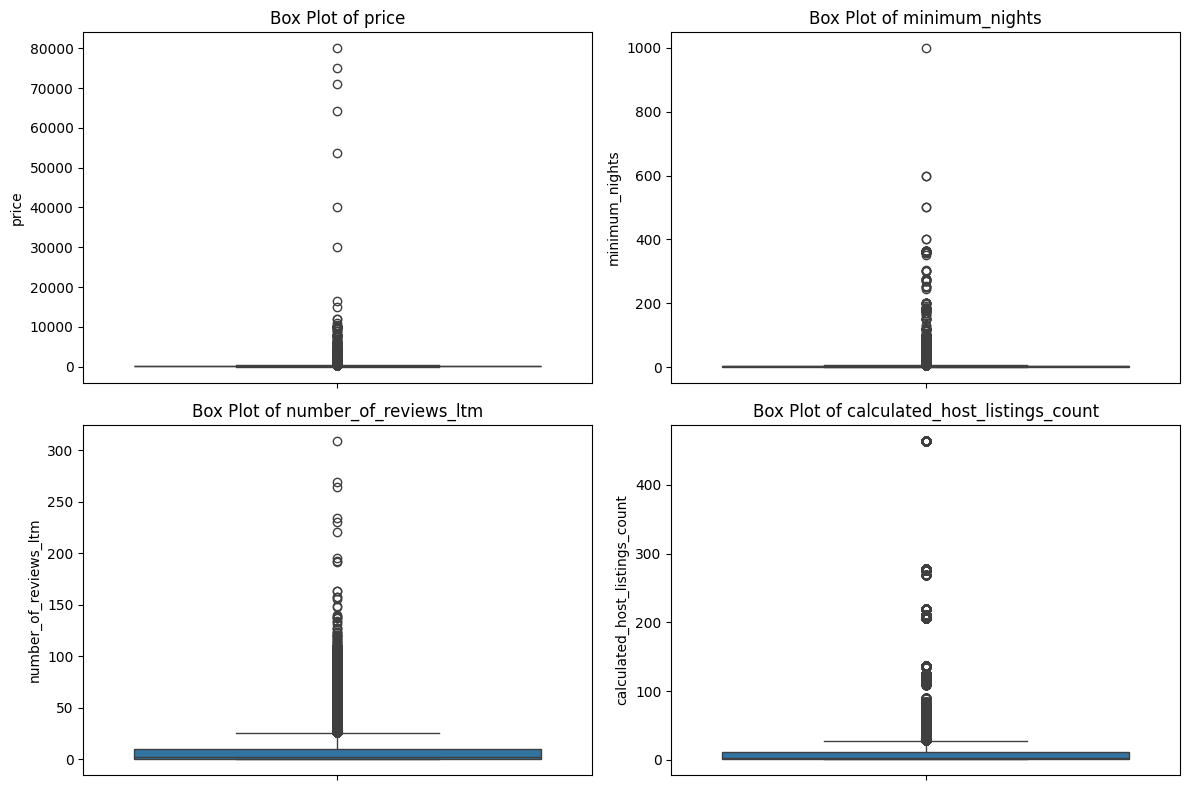

In [34]:
# 이상치 탐색할 주요 변수 목록
outlier_columns = ["price", "minimum_nights", "number_of_reviews_ltm", "calculated_host_listings_count"]


# 이상치 기준 (IQR)
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # 이상치 개수 출력
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    print(f"[{column} 변수]")
    print(f"upper bound: {upper_bound}")
    print(f"lower bound: {lower_bound}")
    print(f"이상치 개수: {len(outliers)}\n")

    return outliers

# 이상치 탐색 실행
for col in outlier_columns:
    detect_outliers(df_cleaned, col)

# 변수별 Box Plot 그리기
plt.figure(figsize=(12, 8))
for i, col in enumerate(outlier_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=df_cleaned[col])
    plt.title(f"Box Plot of {col}")
plt.tight_layout()
plt.show()


### 6-1) 이상치 탐색 및 처리 - price

price가 너무 높은 숙소는 고급 호텔 등일 가능성이 높다.   
왓슨씨는 임대료 예산을 런던 임대료의 25~75% 사이로 잡고 있기 때문에,    
고급 호텔은 왓슨씨의 임대 후보군이 아니라고 볼 수 있다.   

따라서, 숙소 유형 별 price를 살펴본 후, 적정한 상한선을 설정하기로 한다.

                                           count        mean         std  \
property_type                                                              
property_type_Entire condo                6355.0  211.287962  261.111885   
property_type_Entire home                 5838.0  329.710346  427.730200   
property_type_Entire serviced apartment   1636.0  277.589242  258.278917   
property_type_Entire vacation home          49.0  218.795918  135.609885   
property_type_Other                      48279.0  189.545144  862.657417   
property_type_Private room                  39.0   80.358974   55.949925   
property_type_Room in hotel                529.0  211.786389  220.137375   
property_type_Shared room                    2.0  123.500000  108.187338   
property_type_Tiny home                     50.0   96.400000   34.893424   

                                          min     25%    50%     75%      max  
property_type                                                                  
pro

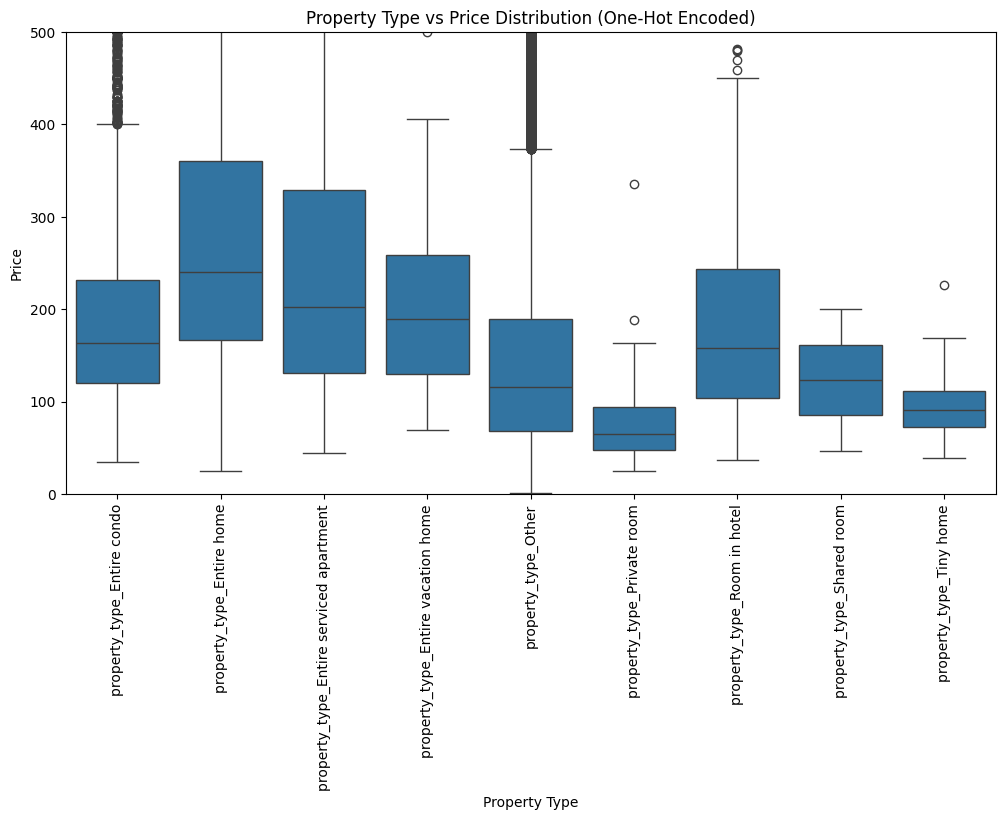

In [35]:
# 원-핫 인코딩된 숙소 유형 컬럼 추출
property_columns = df_cleaned.filter(like="property_type").columns

# Melt를 사용하여 긴 형태로 변환
df_melted = df_cleaned.melt(id_vars=["price"], value_vars=property_columns, var_name="property_type", value_name="is_type")

# 특정 숙소 유형에 해당하는 행만 필터링 (is_type == 1인 경우)
df_melted = df_melted[df_melted["is_type"] == 1]

# 숙소 유형별 price 통계량
price_stats = df_melted.groupby("property_type")["price"].describe()
print(price_stats)

# 박스플롯 시각화
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_melted, x="property_type", y="price")
plt.xticks(rotation=90)
plt.ylim(0, df_cleaned["price"].quantile(0.95))  # 극단적인 이상치 제외
plt.title("Property Type vs Price Distribution (One-Hot Encoded)")
plt.xlabel("Property Type")
plt.ylabel("Price")
plt.show()


대부분의 숙소 유형 별 가격의 1.5xIQR 이 400 이하에서 머무르는 것을 볼 수 있다.   
따라서 이상치 상한을 설정하는 것이 좋을 것으로 판단된다,   

하지만, 1.5xIQR이 400을 초과하는 Entire_home / Entire_serviced apartment / Room in hotel 을 고려할 필요 또한 있으므로   
price 상한은 여유롭게 1000으로 설정한다.

In [36]:
# 이상치 제거 전 데이터 개수
before_count = df_cleaned.shape[0]

# price가 1000을 초과하는 행 제거
df_cleaned = df_cleaned[df_cleaned["price"] <= 1000]

# 이상치 제거 후 데이터 개수
after_count = df_cleaned.shape[0]

# 제거된 데이터 개수 출력
removed_count = before_count - after_count

print(f"이상치 제거 전 데이터 개수: {before_count}")
print(f"이상치 제거 후 데이터 개수: {after_count}")
print(f"제거된 데이터 개수: {removed_count}")

이상치 제거 전 데이터 개수: 62777
이상치 제거 후 데이터 개수: 62088
제거된 데이터 개수: 689


### 6-2) 이상치 탐색 및 처리 - minimum_nights

- 런던 시는 단기임대에 대한 규제를 강화하고 있음.
  - 특히 90일 규제를 도입하여 에어비앤비와 같은 플랫폼에서 연간 90일 이상 단기임대를 할 수 없도록 하고 있음

- 또한, 단기 임대는 성수기에 월세보다 높은 수익을 올릴 수 있다는 장점이 있음.

- 따라서, 왓슨씨는 연 중 성수기 기간은 단기 임대 + 나머지 동안 장기임대를 하는 전략을 채택하기로 함.

- 성수기 기간은 적어도 1년에 한 번씩 돌아옴. 따라서, minimum_nights 값이 365보다 큰 값은 제외되어야 함.

In [37]:
# 이상치 제거 전 데이터 개수
before_count = df_cleaned.shape[0]

# minimum_nights가 365을 초과하는 행 제거
df_cleaned = df_cleaned[df_cleaned["minimum_nights"] <= 365]

# 이상치 제거 후 데이터 개수
after_count = df_cleaned.shape[0]

# 제거된 데이터 개수 출력
removed_count = before_count - after_count

print(f"이상치 제거 전 데이터 개수: {before_count}")
print(f"이상치 제거 후 데이터 개수: {after_count}")
print(f"제거된 데이터 개수: {removed_count}")

이상치 제거 전 데이터 개수: 62088
이상치 제거 후 데이터 개수: 62082
제거된 데이터 개수: 6


### 6-3) 이상치 탐색 및 처리 - number_of_reviews_ltm

연 평균 리뷰 개수가 너무 많은 숙소는 극소수의 인기 숙소일 가능성이 높음.   
해당 데이터가 반드시 이상치는 아니지만,   
유효한 분석을 위해 극단적인 값들만 제거.

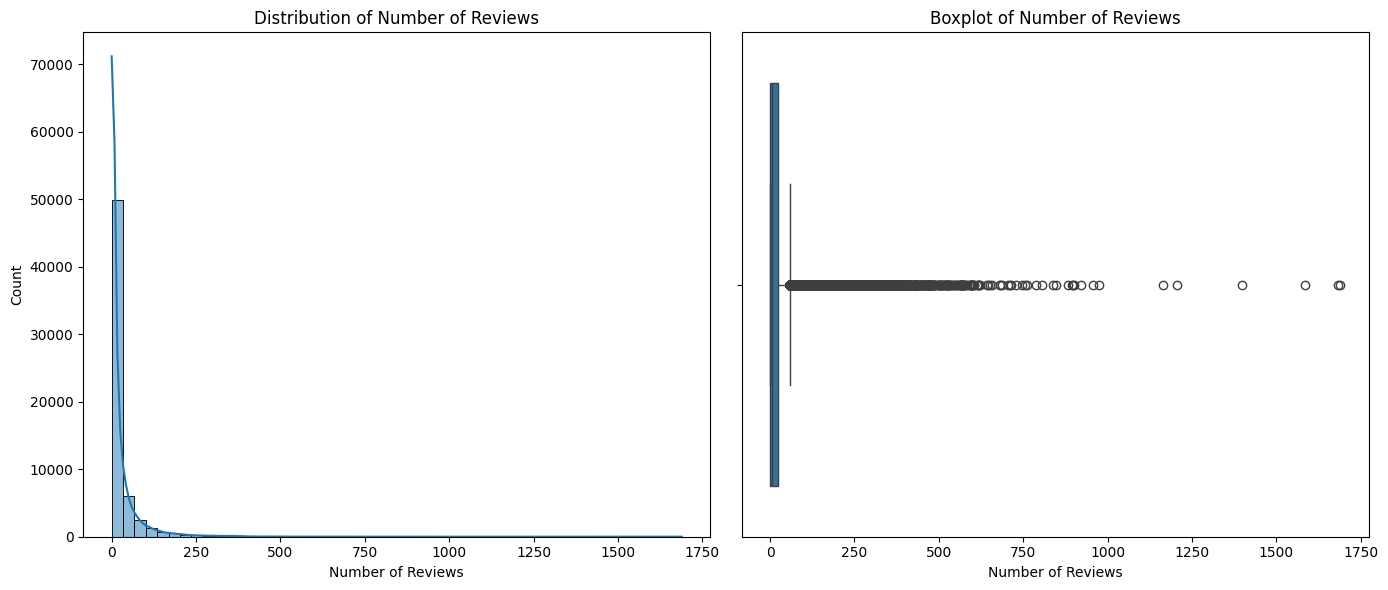

In [38]:
# 극단적인 값 시각화하기

# 그래프 크기 설정
plt.figure(figsize=(14, 6))

# (1) 리뷰 개수 히스토그램
plt.subplot(1, 2, 1)
sns.histplot(df_cleaned["number_of_reviews"], bins=50, kde=True)
plt.title("Distribution of Number of Reviews")
plt.xlabel("Number of Reviews")
plt.ylabel("Count")

# (2) 박스플롯
plt.subplot(1, 2, 2)
sns.boxplot(x=df_cleaned["number_of_reviews"])
plt.title("Boxplot of Number of Reviews")
plt.xlabel("Number of Reviews")

plt.tight_layout()
plt.show()


그래프를 보았을 때, 250개부터 0에 수렴하는 양상을 볼 수 있으며,   
첫 단계에서의 IQR 박스 플롯을 통해 1.5xIQR 값이 25 수준에서 머무는 것을 볼 수 있었음.   
250 이상부터 극단치로 보아도 무방할 것으로 판단되나,   
약간의 여유를 위해 상한선을 365로 설정 (하루 한 개의 리뷰)


In [39]:
# 이상치 제거 전 데이터 개수
before_count = df_cleaned.shape[0]

# number_of_reviews_ltm이 365을 초과하는 행 제거
df_cleaned = df_cleaned[df_cleaned["number_of_reviews_ltm"] <= 365]

# 이상치 제거 후 데이터 개수
after_count = df_cleaned.shape[0]

# 제거된 데이터 개수 출력
removed_count = before_count - after_count

print(f"이상치 제거 전 데이터 개수: {before_count}")
print(f"이상치 제거 후 데이터 개수: {after_count}")
print(f"제거된 데이터 개수: {removed_count}")

이상치 제거 전 데이터 개수: 62082
이상치 제거 후 데이터 개수: 62082
제거된 데이터 개수: 0


### 6-4) 이상치 탐색 및 처리 - calculated_host_listings_count

calculated_host_listings_count 는 호스트가 운영하는 숙소 개수를 의미함.
일반적인 호스트는 5개 이하의 숙소를 운영하며,   
왓슨씨의 예산으로는 5개 초과의 숙소를 운영하기 어려움.   

따라서 상한선을 5로 설정할 수 있으나, 약간의 여유를 위해 10으로 설정.

In [40]:
# 이상치 제거 전 데이터 개수
before_count = df_cleaned.shape[0]

# calculated_host_listings_count가 10을 초과하는 행 제거
df_cleaned = df_cleaned[df_cleaned["calculated_host_listings_count"] <= 10]

# 이상치 제거 후 데이터 개수
after_count = df_cleaned.shape[0]

# 제거된 데이터 개수 출력
removed_count = before_count - after_count

print(f"이상치 제거 전 데이터 개수: {before_count}")
print(f"이상치 제거 후 데이터 개수: {after_count}")
print(f"제거된 데이터 개수: {removed_count}")

이상치 제거 전 데이터 개수: 62082
이상치 제거 후 데이터 개수: 45941
제거된 데이터 개수: 16141


# 5. 변수 간 상관관계 분석

## 1) 전체적인 변수 간 상관관계 분석

[목적]
- 중복되는 정보가 있는 변수들을 확인하여 컬럼 제거 가능성 모색
- 가설 검증 전에 새로운 가설 추가 시도


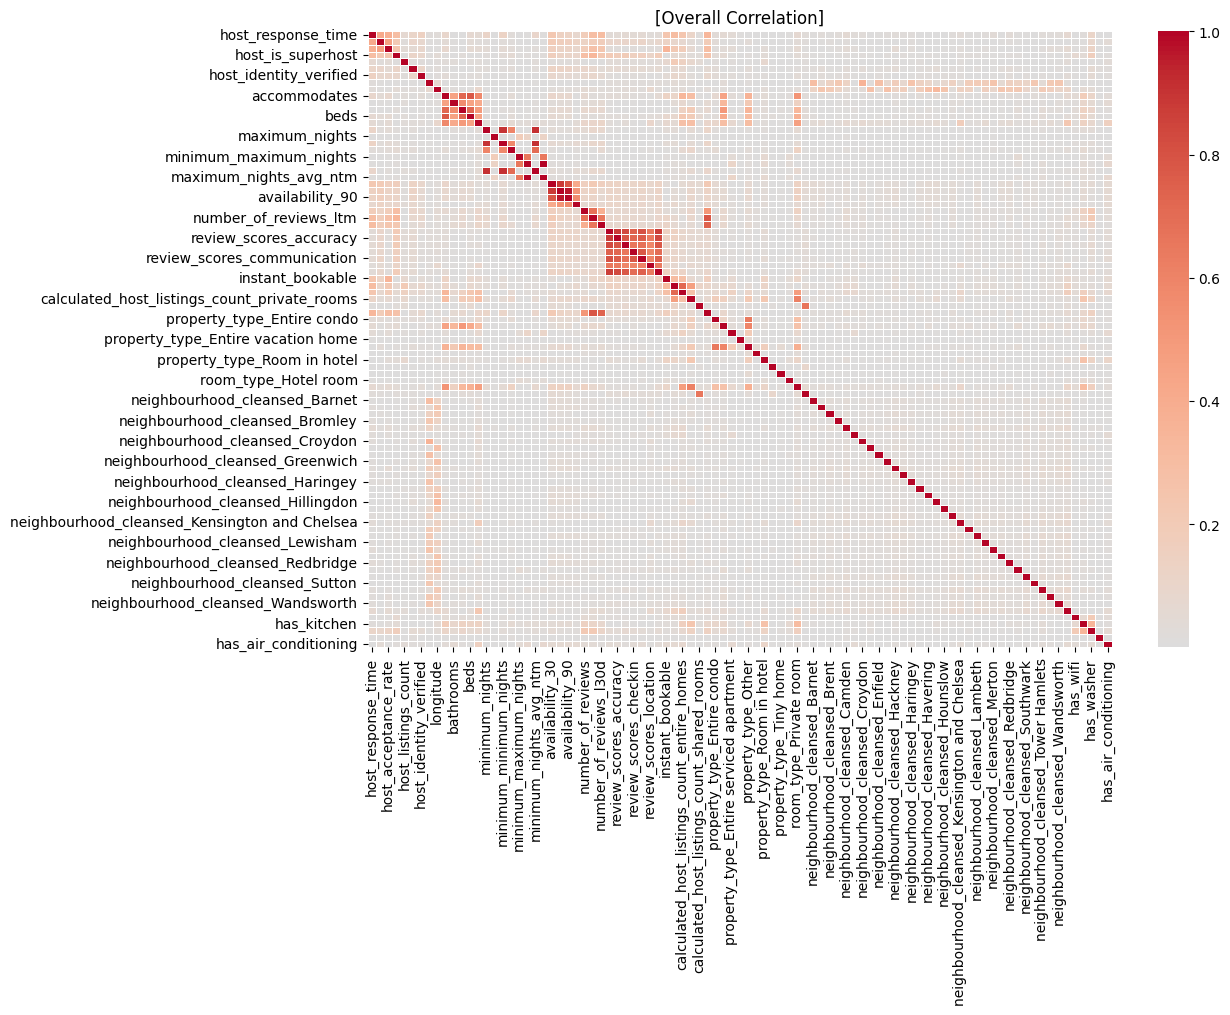

[상위 10개 상관관계]
maximum_nights_avg_ntm     maximum_maximum_nights    0.999999
availability_90            availability_60           0.961487
minimum_nights_avg_ntm     minimum_minimum_nights    0.911407
                           minimum_nights            0.910261
minimum_minimum_nights     minimum_nights            0.900883
availability_60            availability_30           0.878855
review_scores_accuracy     review_scores_rating      0.876212
review_scores_value        review_scores_rating      0.867892
                           review_scores_accuracy    0.834230
review_scores_cleanliness  review_scores_rating      0.828884
dtype: float64


In [41]:
# 상관관계 행렬 계산
correlation_matrix = df_cleaned.corr().abs()

# 히트맵 시각화
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", center=0, linewidths=0.5)
plt.title("[Overall Correlation]")
plt.show()

# 중복 제거: 상삼각행렬의 값만 남기기 (자기 자신과의 관계 제외)
correlation_matrix = correlation_matrix.where(
    ~np.tril(np.ones(correlation_matrix.shape), k=0).astype(bool)
)

# 상관계수 테이블을 펼쳐서 정렬
top_correlations = correlation_matrix.unstack().dropna().sort_values(ascending=False).head(10)


# 결과 출력
print("[상위 10개 상관관계]")
print(top_correlations)

[거의 1에 가까운 상관관계]
- maximum_nights_avg_ntm ↔ maximum_maximum_nights (0.999)   
   → 거의 같은 정보이므로 둘 중 하나를 제거
    * maximum_maximum_nights : 최대 숙박 가능 일수를 직접적으로 나타낸 변수
    * maximum_nights_avg_ntm : 매월 호스트가 설정한 최대 숙박 가능 일수의 평균값   
   → maximum_nights_avg_ntm가 변화 패턴을 나타내는 변수이므로 **maximum_maximum_nights를 제거**

[매우 높은 상관관계 (0.90 이상)]   
- availability_90 ↔ availability_60 (0.961)   
   → n일 간의 숙박 가능 일수를 나타내는 변수. 각각 장/단기적 예약 현황을 파악할 수 있으므로 둘 다 남겨둠.
- minimum_nights_avg_ntm ↔ minimum_minimum_nights (0.911)
- minimum_nights ↔ minimum_nights_avg_ntm (0.910)
- minimum_nights ↔ minimum_minimum_nights (0.900)   
   → 거의 같은 정보이므로 셋 중 하나만 남김
    * minimum_nights : 해당 숙소에서 예약할 수 있는 최소 숙박 일수
    * minimum_nights_avg_ntm : 최근 12개월 동안 평균적으로 적용된 최소 숙박 일수
    * minimum_minimum_nights : 과거 예약 데이터에서 최소 숙박 일수의 최솟값   
   → minimum_nights_avg_ntm가 변화 패턴을 나타내는 변수이므로 **maximum_nights_avg_ntm만 남기고 나머지 제거**


In [42]:
# 제거할 변수 목록
columns_to_drop = [
    "maximum_maximum_nights",  # 최대 숙박 가능 일수 (변화 패턴을 보기 위해 maximum_nights_avg_ntm 유지)
    "minimum_nights",  # 최소 숙박 가능 일수 (변화 패턴을 보기 위해 minimum_nights_avg_ntm 유지)
    "minimum_minimum_nights"  # 과거 예약 데이터에서 최소 숙박 일수의 최솟값
]

# 데이터프레임에서 해당 컬럼 삭제
df_cleaned = df_cleaned.drop(columns=columns_to_drop)

# 결과 확인
print(f"제거된 컬럼: {columns_to_drop}")
print(f"현재 남아 있는 컬럼 개수: {len(df_cleaned.columns)}")

제거된 컬럼: ['maximum_maximum_nights', 'minimum_nights', 'minimum_minimum_nights']
현재 남아 있는 컬럼 개수: 88


## 2) 기존 가설 검증을 위한 상관관계 분석

###문제 1: 어떤 지역이 에어비앤비 숙소 운영에 가장 수익성이 높은가?
- 가설: 중심지에 위치한 숙소일수록 높은 수익을 올릴 것이다.
- 분석할 변수:
  - neighbourhood_cleansed (숙소가 위치한 지역)
  - price (숙박 요금)
  - availability_365 (연간 예약 가능 일수)
  - number_of_reviews (리뷰 수) *이탤릭체 텍스트*

#### 중심에서의 거리와 수익 및 예약률 사이의 상관관계

##### 중심지 순위

In [43]:
# 중심 좌표 (런던)
central_lat = 51.5074
central_lon = -0.1278

# 하버사인 거리 계산 함수 (두 지점 사이의 거리)
def haversine(lat1, lon1, lat2, lon2):
    # 각도를 라디안으로 변환
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])

    # 하버사인 공식 적용
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

    # 지구의 반지름 (단위: km)
    R = 6371.0
    return R * c

# 각 지역의 위도와 경도
df_cleaned["distance_to_center"] = df_cleaned.apply(
    lambda row: haversine(row["latitude"], row["longitude"], central_lat, central_lon), axis=1
)

# 각 지역의 칼럼을 합쳐서 하나의 칼럼 만들기
df_cleaned['neighbourhood_cleansed'] = df_cleaned.filter(like='neighbourhood_cleansed').apply(lambda row: row.idxmax(), axis=1)

# 중심지에서 가까운 순으로 정렬
sorted_neighbourhoods = df_cleaned.groupby("neighbourhood_cleansed")["distance_to_center"].mean().sort_values()

# 결과 출력 (상위 10개 중심지에 가까운 지역)
print(sorted_neighbourhoods.head(10))

neighbourhood_cleansed
neighbourhood_cleansed_City of London            2.667513
neighbourhood_cleansed_Westminster               2.959674
neighbourhood_cleansed_Camden                    3.822236
neighbourhood_cleansed_Islington                 4.467827
neighbourhood_cleansed_Southwark                 4.480853
neighbourhood_cleansed_Kensington and Chelsea    4.689093
neighbourhood_cleansed_Lambeth                   5.067237
neighbourhood_cleansed_Hackney                   6.111500
neighbourhood_cleansed_Tower Hamlets             6.150422
neighbourhood_cleansed_Hammersmith and Fulham    6.551369
Name: distance_to_center, dtype: float64


##### 거리와 수익의 상관관계 분석하기

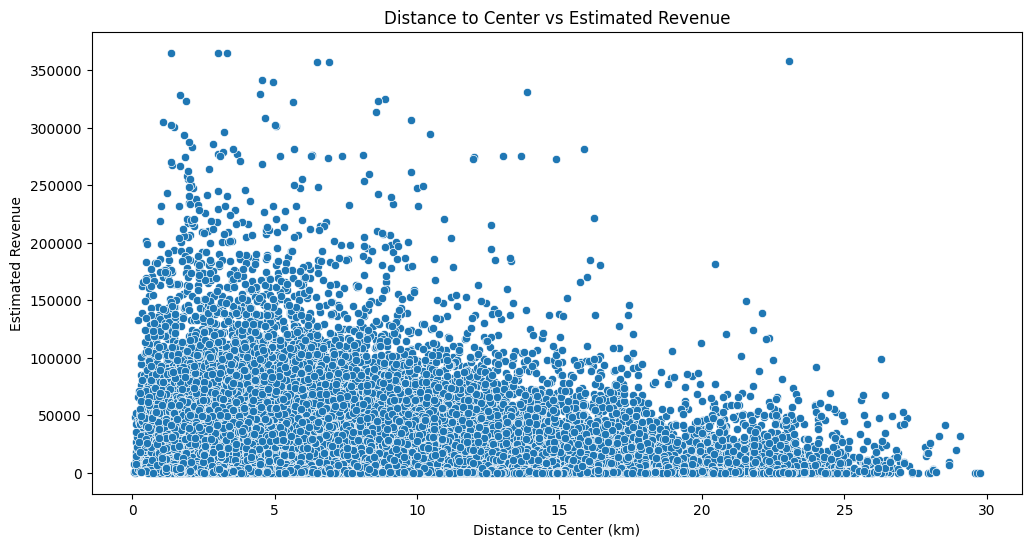

                    distance_to_center  estimated_revenue
distance_to_center            1.000000          -0.246317
estimated_revenue            -0.246317           1.000000


In [44]:
# 예약된 날짜 수 계산
df_cleaned["booked_days"] = 365 - df_cleaned["availability_365"]

# 실제 예상 수익 계산 (예약된 날짜 수 × 가격)
df_cleaned["estimated_revenue"] = df_cleaned["booked_days"] * df_cleaned["price"]

# 중심지와의 거리와 예상 수익 시각화
plt.figure(figsize=(12, 6))
sns.scatterplot(x="distance_to_center", y="estimated_revenue", data=df_cleaned)
plt.xlabel("Distance to Center (km)")
plt.ylabel("Estimated Revenue")
plt.title("Distance to Center vs Estimated Revenue")
plt.show()

# 상관관계 계산 (중심지와의 거리와 예상 수익)
correlation = df_cleaned[["distance_to_center", "estimated_revenue"]].corr()
print(correlation)

**중심지와의 거리가 수익률에 큰 영향을 미치지 않는 이유**

- 중심지 근처에 있는 숙소가 아닌 한적한 곳에서 묵기를 원하는 수요가 있을 수 있음.
- 중심지에 가까울수록 숙소가 많아 가격 경쟁이 있을 수 있음.
- 교통망이 잘 갖추어져있다면 중심에서 멀더라도 수익률이 높을 수 있음.
- 중심이 아니더라도 관광지가 산개되어 있는 경우 중심에서 먼 숙소이더라도 높은 수익률을 낼 수 있음.


#### 히트맵으로 표현한 지역별 수익률

**용량 문제로 코드 미출력 상태로 두겠습니다.**



In [45]:
'''
import folium
from folium.plugins import HeatMap

# 가격과 예약 가능 일수로 예상 수익 계산 (예약된 날짜 수 = 365 - availability_365)
df_cleaned["estimated_revenue"] = (365 - df_cleaned["availability_365"]) * df_cleaned["price"].replace("[\$,]", "", regex=True).astype(float)

# 위도와 경도 숫자형으로 변환
df_cleaned["latitude"] = pd.to_numeric(df_cleaned["latitude"], errors="coerce")
df_cleaned["longitude"] = pd.to_numeric(df_cleaned["longitude"], errors="coerce")

# 결측값 제거
df_cleaned = df_cleaned.dropna(subset=["latitude", "longitude", "estimated_revenue"])

# 예상 수익이 0 또는 매우 작은 값일 수 있으므로 조건 확인
df_cleaned = df_cleaned[df_cleaned["estimated_revenue"] > 0]

# 히트맵 데이터 준비 (위도, 경도, 예상 수익)
heatmap_data = df_cleaned[["latitude", "longitude", "estimated_revenue"]].values

# 데이터가 제대로 준비되었는지 확인
print(heatmap_data[:10])  # 상위 10개 데이터 확인

# 지도 생성 (런던 중심)
map_london = folium.Map(location=[51.5074, -0.1278], zoom_start=11)

# 히트맵 추가
HeatMap(heatmap_data, radius=30, blur=20, max_zoom=13).add_to(map_london)

# 지도 저장 및 출력
map_london.save("london_airbnb_heatmap.html")
map_london

'''

'\nimport folium\nfrom folium.plugins import HeatMap\n\n# 가격과 예약 가능 일수로 예상 수익 계산 (예약된 날짜 수 = 365 - availability_365)\ndf_cleaned["estimated_revenue"] = (365 - df_cleaned["availability_365"]) * df_cleaned["price"].replace("[\\$,]", "", regex=True).astype(float)\n\n# 위도와 경도 숫자형으로 변환\ndf_cleaned["latitude"] = pd.to_numeric(df_cleaned["latitude"], errors="coerce")\ndf_cleaned["longitude"] = pd.to_numeric(df_cleaned["longitude"], errors="coerce")\n\n# 결측값 제거\ndf_cleaned = df_cleaned.dropna(subset=["latitude", "longitude", "estimated_revenue"])\n\n# 예상 수익이 0 또는 매우 작은 값일 수 있으므로 조건 확인\ndf_cleaned = df_cleaned[df_cleaned["estimated_revenue"] > 0]\n\n# 히트맵 데이터 준비 (위도, 경도, 예상 수익)\nheatmap_data = df_cleaned[["latitude", "longitude", "estimated_revenue"]].values\n\n# 데이터가 제대로 준비되었는지 확인\nprint(heatmap_data[:10])  # 상위 10개 데이터 확인\n\n# 지도 생성 (런던 중심)\nmap_london = folium.Map(location=[51.5074, -0.1278], zoom_start=11)\n\n# 히트맵 추가\nHeatMap(heatmap_data, radius=30, blur=20, max_zoom=13).add_to(map_london

- 히트맵에서 핫스팟(빨간색으로 표시되는 지역)은 예상 수익이 높은 지역을 나타냄.
- 빨간색이 여러 곳에 있음.
- 확대를 해보면 한 동네 안에서 특정 지역을 중심으로 수익률이 높은 것을 확인할 수 있음.


#### 위치별 숙소 가격

**용량 문제로 코드 미출력 상태로 두겠습니다.**

In [46]:
'''
import folium
from folium.plugins import MarkerCluster

# 가격을 숫자 형태로 변환
df_cleaned["price"] = df_cleaned["price"].replace("[\$,]", "", regex=True).astype(float)

# 위도, 경도, 가격 열을 선택하여 결측값 제거
df_cleaned = df_cleaned.dropna(subset=["latitude", "longitude", "price"])

# **런던 중심 좌표로 지도 생성**
map_london = folium.Map(location=[51.5074, -0.1278], zoom_start=11)

# MarkerCluster 추가 (마커를 군집화)
marker_cluster = MarkerCluster().add_to(map_london)

# 각 숙소에 대해 가격을 색상으로 표현
for idx, row in df_cleaned.iterrows():
    price = row['price']
    latitude = row['latitude']
    longitude = row['longitude']

    # 가격에 따라 색상을 설정 (가격이 높을수록 빨간색, 낮을수록 파란색)
    if price < 50:
        color = 'blue'
    elif price < 100:
        color = 'green'
    elif price < 200:
        color = 'orange'
    else:
        color = 'red'

    # 마커 추가
    folium.CircleMarker(
        location=[latitude, longitude],
        radius=5,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.6,
        popup=f'Price: ${price}',
    ).add_to(marker_cluster)

# 지도 저장 및 출력
map_london.save("london_airbnb_price_map.html")
map_london
'''

'\nimport folium\nfrom folium.plugins import MarkerCluster\n\n# 가격을 숫자 형태로 변환\ndf_cleaned["price"] = df_cleaned["price"].replace("[\\$,]", "", regex=True).astype(float)\n\n# 위도, 경도, 가격 열을 선택하여 결측값 제거\ndf_cleaned = df_cleaned.dropna(subset=["latitude", "longitude", "price"])\n\n# **런던 중심 좌표로 지도 생성**\nmap_london = folium.Map(location=[51.5074, -0.1278], zoom_start=11)\n\n# MarkerCluster 추가 (마커를 군집화)\nmarker_cluster = MarkerCluster().add_to(map_london)\n\n# 각 숙소에 대해 가격을 색상으로 표현\nfor idx, row in df_cleaned.iterrows():\n    price = row[\'price\']\n    latitude = row[\'latitude\']\n    longitude = row[\'longitude\']\n\n    # 가격에 따라 색상을 설정 (가격이 높을수록 빨간색, 낮을수록 파란색)\n    if price < 50:\n        color = \'blue\'\n    elif price < 100:\n        color = \'green\'\n    elif price < 200:\n        color = \'orange\'\n    else:\n        color = \'red\'\n\n    # 마커 추가\n    folium.CircleMarker(\n        location=[latitude, longitude],\n        radius=5,\n        color=color,\n        fill=True,\n       

- 파란색: 가격이 50달러 미만
- 초록색: 가격이 50달러 이상 100달러 미만
- 주황색: 가격이 100달러 이상 200달러 미만
- 빨간색: 가격이 200달러 이상

**에어비앤비 숙소 운영 최적 지역 선정 결론**
1. **단순히 중심지일수록 수익이 높다고 할 수 없다.**

상관관계 분석 결과, 중심과의 거리는 수익과 약한 음의 상관관계를 보였다 (-0.27).   
즉, 중심지에 가까울수록 수익이 높아지는 경향은 있으나, 크지 않다.

2. **고가 숙소가 몰려 있는 중심부는 가격 경쟁과 운영 비용 증가로 인해 순이익이 낮을 가능성이 있음.**

중심부에 위치한 숙소는 가격이 높아 예상 수익이 커 보이지만,    
높은 운영 비용(임대료, 유지비 등)과 경쟁으로 인해 실제 이윤이 크지 않을 수 있다.

3. **관광지, 교통 접근성이 좋은 비(非)중심 지역이 경쟁력 있는 선택이 될 수 있음.**

히트맵 분석 결과, 중심지가 아니더라도 예상 수익이 높은 지역(핫스팟)이 여러 곳 존재함.   
이는 관광지, 교통 인프라, 지역별 특성 등에 따라 중심이 아니더라도 수익성이 높을 수 있음을 시사함.

**따라서**   
✅ 중심지에서 다소 벗어나 임대료 부담은 덜지만, 관광객 수요가 높은 지역   
✅ 교통 접근성이 좋고, 경쟁이 덜한 곳   
✅ 숙박 가격 대비 운영 비용(임대료, 유지비)이 적정한 지역   

###문제 2: 숙소의 어떤 특성이 높은 숙박 요금과 연관되어 있는가?
- 가설: 더 많은 편의시설과 넓은 공간을 제공하는 숙소는 높은 숙박 요금을 받을 것이다.
- 분석할 변수:
  - amenities_count (제공하는 편의시설 수)
  - bedrooms (침실 수)
  - bathrooms (욕실 수)
  - price (숙박 요금)

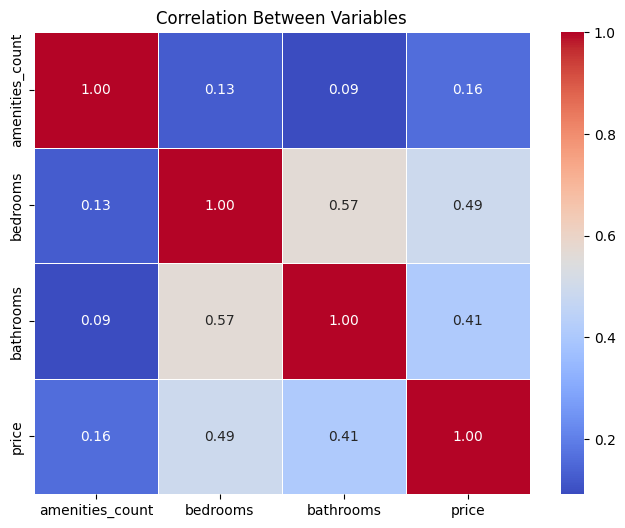

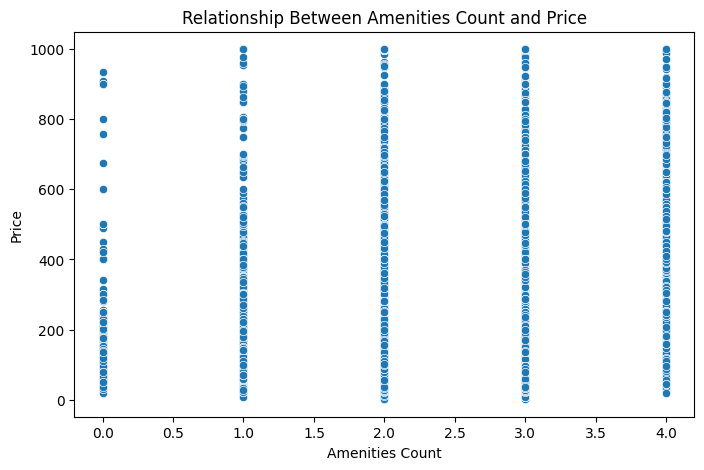

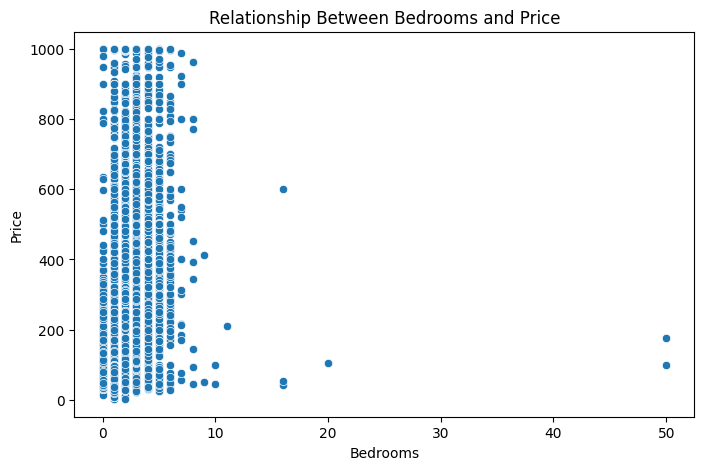

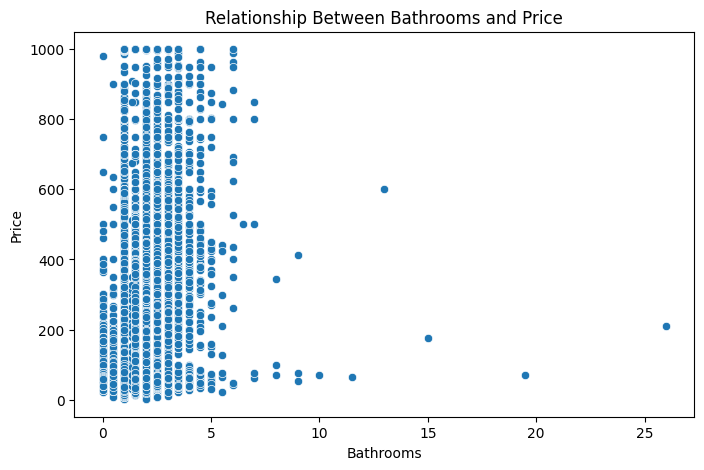

In [47]:
# 1. 'has_wifi', 'has_kitchen', 'has_washer', 'has_parking', 'has_air_conditioning' 컬럼을 이용하여 amenities_count 계산
df_cleaned['amenities_count'] = df_cleaned[['has_wifi', 'has_kitchen', 'has_washer', 'has_parking', 'has_air_conditioning']].sum(axis=1)

# 2. 상관 관계 분석을 위한 상관 관계 매트릭스 생성
correlation_matrix = df_cleaned[['amenities_count', 'bedrooms', 'bathrooms', 'price']].corr()

# 3. 상관 관계 매트릭스를 히트맵으로 시각화
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Between Variables')
plt.show()

# 4. amenities_count와 price 간의 관계 시각화
plt.figure(figsize=(8,5))
sns.scatterplot(x='amenities_count', y='price', data=df_cleaned)
plt.title('Relationship Between Amenities Count and Price')
plt.xlabel('Amenities Count')
plt.ylabel('Price')
plt.show()

# 5. bedrooms와 price 간의 관계 시각화
plt.figure(figsize=(8,5))
sns.scatterplot(x='bedrooms', y='price', data=df_cleaned)
plt.title('Relationship Between Bedrooms and Price')
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.show()

# 6. bathrooms와 price 간의 관계 시각화
plt.figure(figsize=(8,5))
sns.scatterplot(x='bathrooms', y='price', data=df_cleaned)
plt.title('Relationship Between Bathrooms and Price')
plt.xlabel('Bathrooms')
plt.ylabel('Price')
plt.show()

In [48]:
df_cleaned_zz = df_cleaned.select_dtypes(include=['number'])

# price와 다른 변수들 간의 상관관계 계산
price_correlations = df_cleaned_zz.corr()["price"].dropna().sort_values(ascending=False)


# 상위 10개 상관관계 출력
top_10_price_correlations = price_correlations.head(10)
print(top_10_price_correlations)


price                                          1.000000
estimated_revenue                              0.603122
accommodates                                   0.580829
bedrooms                                       0.492607
beds                                           0.446617
bathrooms                                      0.408863
calculated_host_listings_count_entire_homes    0.277303
amenities_count                                0.159454
has_air_conditioning                           0.152580
has_kitchen                                    0.136622
Name: price, dtype: float64



#### **두번째 가설의 결론**

*   Price(숙박요금)와 높은 상관관계를 가지는 변수는,   
아래와 같은 방의 수나 크기와 관련된 요소가 전부를 차지했다.
  - accomodates (수용 가능 인원 수)
  - bedrooms
  - beds
  - bathrooms

* 하지만, 편의시설의 수는 상관계수 0.16으로 유의미한 수치를 보이지 못했다.

* 따라서, 방의 수가 많을수록 높은 숙박요금을 받을 수 있다.


###문제 3: 호스트의 응답성이 예약률에 영향을 미치는가?
- 가설: 호스트의 응답률이 높을수록 예약률도 높을 것이다.
- 분석할 변수:
  - host_response_rate (호스트 응답률)
  - availability_365 (연간 예약 가능 일수)
  - number_of_reviews (리뷰 수)

예약률과 host_response_rate 상관계수: 0.12729269077952093
리뷰 수와 host_response_rate 상관계수: 0.1267183840182262


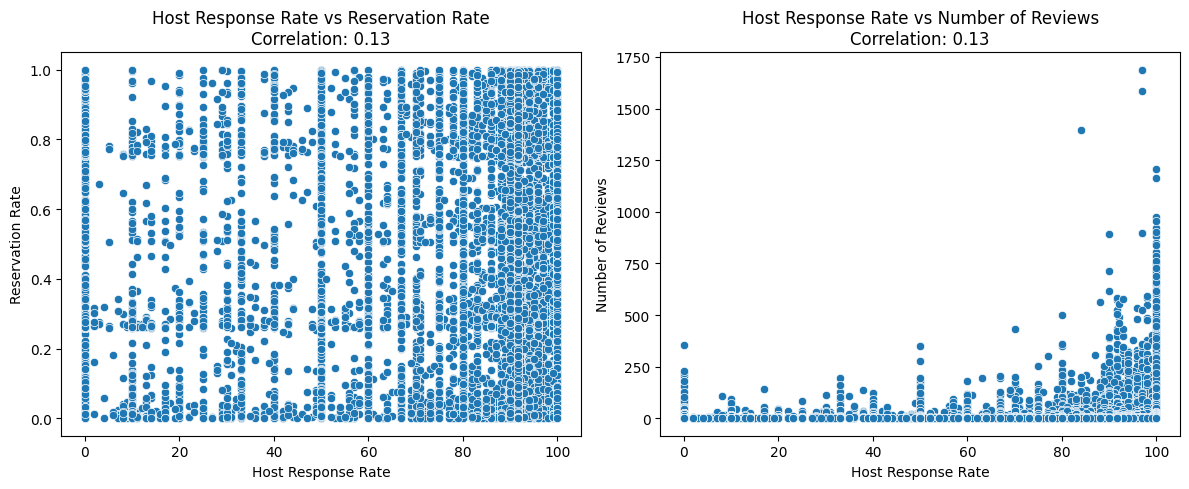

In [49]:
#호스트 응답성과 예약률 사이의 상관관계

df_cleaned['reservation_rate'] = (365 - df_cleaned['availability_365']) / 365
corr_value = df_cleaned['host_response_rate'].corr(df_cleaned['reservation_rate'])
df_cleaned['host_response_reserved_corr']=corr_value

print("예약률과 host_response_rate 상관계수:", corr_value)

#호스트 응답성과 리뷰 수 사이의 상관관계
corr_value1 = df_cleaned['host_response_rate'].corr(df_cleaned['number_of_reviews'])
df_cleaned['host_response_reviews_corr']=corr_value1
print("리뷰 수와 host_response_rate 상관계수:", corr_value1)

# 시각화

plt.figure(figsize=(12, 5))

# 첫 번째 서브플롯: host_response_rate vs reservation_rate
plt.subplot(1, 2, 1)
sns.scatterplot(data=df_cleaned, x='host_response_rate', y='reservation_rate')
plt.title(f"Host Response Rate vs Reservation Rate\nCorrelation: {corr_value:.2f}")
plt.xlabel("Host Response Rate")
plt.ylabel("Reservation Rate")

# 두 번째 서브플롯: host_response_rate vs number_of_reviews
plt.subplot(1, 2, 2)
sns.scatterplot(data=df_cleaned, x='host_response_rate', y='number_of_reviews')
plt.title(f"Host Response Rate vs Number of Reviews\nCorrelation: {corr_value1:.2f}")
plt.xlabel("Host Response Rate")
plt.ylabel("Number of Reviews")

plt.tight_layout()
plt.show()

평점과 host_response_rate 상관계수: 0.09499453895388879


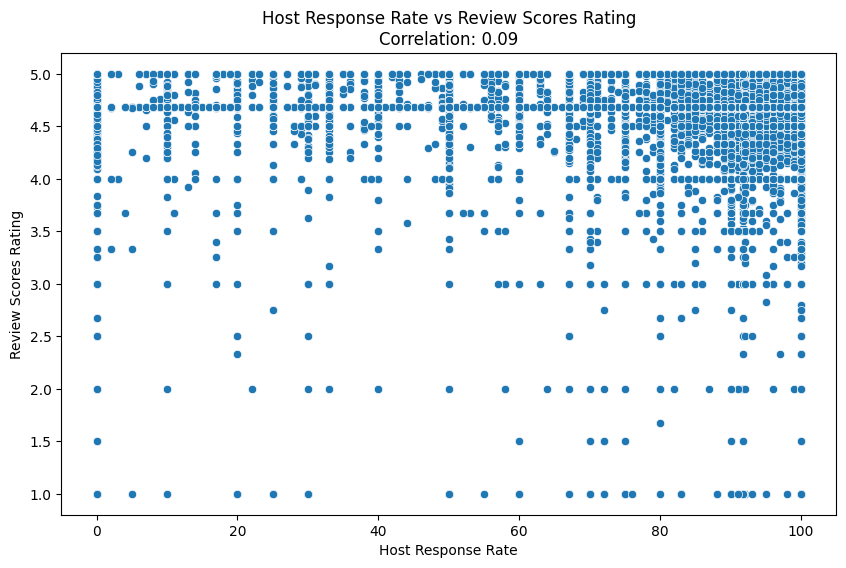

In [50]:
# 3-3 호스트 응답성과 숙소 평점 사이의 상관관계

corr_value = df_cleaned['host_response_rate'].corr(df_cleaned['review_scores_rating'])
df_cleaned['host_response_scores_corr']=corr_value

print("평점과 host_response_rate 상관계수:", corr_value)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cleaned, x='host_response_rate', y='review_scores_rating')
plt.title(f"Host Response Rate vs Review Scores Rating\nCorrelation: {corr_value:.2f}")
plt.xlabel("Host Response Rate")
plt.ylabel("Review Scores Rating")
plt.show()

In [51]:
#3-4 리뷰 평점과 다른 칼럼들 간의 상관계수

# 전체 상관계수 행렬 계산
corr_matrix = df_cleaned_zz.corr()

# review_scores_rating과 다른 칼럼들 간의 상관계수 추출 (자기 자신은 제외)
corr_with_rating = corr_matrix['review_scores_rating'].drop('review_scores_rating')

# 절대값 기준 내림차순으로 정렬
sorted_corr = corr_with_rating.abs().sort_values(ascending=False)

# 정렬된 순서대로 원래의 부호를 유지한 상관계수 출력
sorted_corr_with_sign = corr_with_rating.loc[sorted_corr.index]

print("리뷰 평점과 상관관계가 높은 칼럼들 (절대값 기준 내림차순):")
print(sorted_corr_with_sign)
import pandas as pd
pd.set_option('display.max_rows', None)



리뷰 평점과 상관관계가 높은 칼럼들 (절대값 기준 내림차순):
review_scores_accuracy                          0.876212
review_scores_value                             0.867892
review_scores_cleanliness                       0.828884
review_scores_communication                     0.799115
review_scores_checkin                           0.746276
review_scores_location                          0.652278
host_is_superhost                               0.199992
instant_bookable                               -0.143582
calculated_host_listings_count                 -0.143543
availability_30                                -0.128776
availability_60                                -0.116923
availability_90                                -0.107828
availability_365                               -0.103262
booked_days                                     0.103262
host_response_rate                              0.094995
calculated_host_listings_count_entire_homes    -0.092237
number_of_reviews_ltm                           0.082

In [52]:
#3-5 리뷰 개수와 다른 칼럼들 간의 상관계수

# 전체 상관계수 행렬 계산
corr_matrix = df_cleaned_zz.corr()

# 연간 리뷰 개수와 다른 칼럼들 간의 상관계수 추출 (자기 자신 제외)
corr_with_reservation = corr_matrix['number_of_reviews_ltm'].drop('number_of_reviews_ltm')

# 절대값 기준 내림차순 정렬 (원래 부호 유지)
sorted_corr = corr_with_reservation.abs().sort_values(ascending=False)
sorted_corr_with_sign = corr_with_reservation.loc[sorted_corr.index]

print("number_of_reviews_ltm와 상관관계가 높은 칼럼들 (절대값 기준 내림차순):")
print(sorted_corr_with_sign)

number_of_reviews_ltm와 상관관계가 높은 칼럼들 (절대값 기준 내림차순):
reviews_per_month                               0.781469
number_of_reviews                               0.674409
number_of_reviews_l30d                          0.653632
host_is_superhost                               0.341957
host_response_time                             -0.291666
host_acceptance_rate                            0.270475
has_washer                                     -0.207990
availability_30                                -0.207237
amenities_count                                -0.191400
host_response_rate                              0.174141
availability_60                                -0.134107
distance_to_center                             -0.119944
availability_90                                -0.114625
has_kitchen                                    -0.105087
instant_bookable                                0.104464
review_scores_value                             0.100042
price                                

####가설 3에 대한 결론
호스트 응답률과 예약률 사이의 상관관계가 거의 없음을 확인했다.   
이후 예약 수를 반영한다고 볼 수 있는 리뷰 개수와의 상관관계를 확인했으나 역시 무의미했다.   
고객 선호를 반영하는 리뷰 평점과의 상관관계 역시 무의미했다.

결론적으로 **호스트 응답률은 에어비앤비 매출에 큰 영향을 미치지 않는다**는 것을 알 수 있다.   

<br>

하지만, 일반적으로 생각해보았을 때    
응답률이 높을수록 예약률이 높을 것이라 추측해볼 수 있다.   

의아함에 각각의 변수에 대해 모든 변수와의 상관관계를 계산해보았는데,   
**리뷰 수와 응답 속도** 간 유의미한 관계를 찾을 수 있었다.   

응답을 이틀 뒤에 하면 응답률은 올라갈 것이나, 만족도는 떨어질 수 있다.   
즉, 현 가설을 **응답률이 아닌 응답 속도로 잡았다면**    
유의미한 결과를 낼 수 있었을 것이라 판단한다.

# 6. 인사이트 및 결론

세가지 가설에 대한 검증 결과를 바탕으로 에어비앤비 운영 전략을 다음과 같이 정리할 수 있다.


1.  **위치는 크게 중요하지 않다**     
→ 본인이 거주하는 지역 근처에서 숙소를 운영하여 관리 비용을 절감하는 것이 유리할 수 있다.

2. **방의 수가 중요하다**   
 → 큰 숙소일수록 유리하다. 예산이 허용하는 한에서 가장 큰 방을 선택하는 것이 효과적이다.

3. **어메니티는 예약률에 큰 영향을 미치지 않았다**   
→ 불필요한 어메니티 구비는 운영 비용만 증가시킬 수 있으므로 최소화하는 것이 좋다.


4. **응답률보단 응답 속도에 신경써야 한다**

<br>

그러나, **이번 분석의 한계점**이 있기에 완벽한 답이라고는 할 수 없다.

예를 들어,
- 큰 숙소일수록 유리하다고 결론내렸지만,   
임대료 등의 **운영 비용 대비 매출**을 따져본다면 또 다른 결과가 나올 수 있다.
- 런던의 단기 임대 규제(90일)을 고려해, 왓슨 씨는 **단기+장기의 하이브리드 임대 전략**을 차용하기로 결정했다.   
하지만, 이번 데이터 분석에서는 **장/단기 임대의 수익 차**를 고려하지 못했다.


결론적으로, 이번 분석이 현실을 완벽히 반영하지 못할 수 있음을 고려하면서, **데이터 기반 전략과 개인적인 운영 경험을 함께 조합하여 의사 결정을 내리는 것이 중요**할 것이다.